**Aufgabe 46:**

Schreiben Sie ein Programm, welches das Stabilitätsgebiet eines beliebigen, linearen Mehrschritverfahrens grafisch darstellt. Testen Sie mit den Ihnen bekannten impliziten und expliziten linearen Mehrschrittverfahren. Insbesondere sollen Sie Adams-Bashforth Verfahren (Example 5.5), AdamsMoulton Verfahren (Example 5.6) und BDF Verfahren (Aufgabe 41) verschiedener Ordnung testen.

*Hinweis:* Sie können ein Computeralgebrasysten verwenden. Alternativ können die Nullstellen eines Polynoms über die Eigenwerte der Begleitmatrix numerisch berechnet werden.

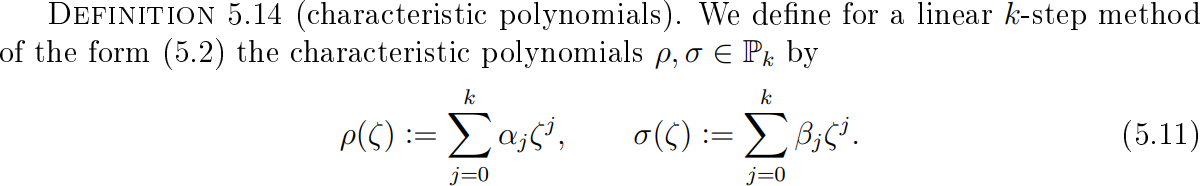

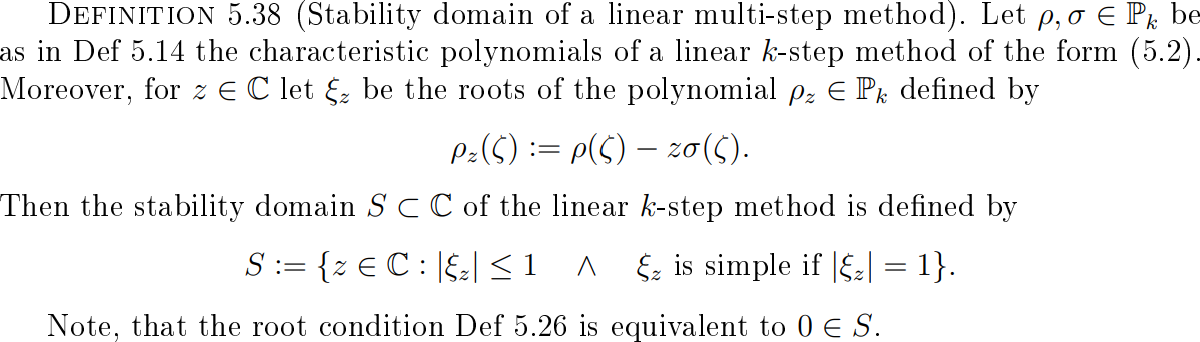

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# calculate BDF method coefficients

t = sp.Symbol("t")

L = lambda t, j, k : np.prod([(t - (1 - i)) / (i - j) for i in range(k+1) if i != j])

coeffs = []

for k in range(1, 10+1):

    coeffs.append([])

    for j in range(k+1):

        D = sp.lambdify(t, sp.diff(L(t, j, k), t), "numpy")
        coeffs[-1].append(D(1))

    n = len(coeffs[-1]) - 1

In [3]:
def stability_domain_levels(l, method):
    
    """
        This function returns the maximum of root absolute values of each point
        in a mesh of complex numbers
        with respec to to a multi-step-method

        l ........ mesh fineness (real and imaginary axis)
        method ... multi-step-method

        This should indicate, how "stable" these points are.
        They SHOULD be
        -   stable, if   ... (< 1) or (= 1 and root is simple)
        - unstabel, else.
    """

    alpha, beta = np.array(method)

    n = len(alpha) - 1
    s = len(l)

    # coefficients of polynomial for checking root simplicity
    p = [(n - l) * alpha[l] for l in range(n)]

    # maximum of root absolute values
    #   stable, if (< 1) or (= 1 and root is simple)
    # unstabel, else
    res = []

    # below tolerance ... == 0
    # above tolerance ... != 0
    tol = 1e-8

    for i in range(s):

        resi = []

        for j in range(s):

            # current complex number
            z = l[j] + l[i] * 1j

            # roots of characteristic polynomial sum
            rho_z = alpha + z * beta
            first_roots = np.roots(rho_z)
            
            # maximum absolute of roots (and 0)
            # if maximum <= 1 then all absolute values of roots are
            x = max([abs(root) for root in first_roots] + [0])

            # check if root is simple (i.e. alone, algebraic multiplicity = 1)
            if abs(x - 1) < tol:

                # x = 1
                resi.append(x)

                for root in first_roots:

                    # root might not be alone
                    if abs(root - 1) < tol:

                        if abs(np.polyval(p, root)) > tol:
                            continue

                        else:
                            # root is not simple
                            # add stupidly high value ... 2
                            # (this point will definitelly not be in stability domain)
                            resi[-1] = 2
                            break

            else:

                if x < 1:
                    resi.append(x)

                else:
                    # add stupidly high value ... 2
                    # (this point will definitelly not be in stability domain)
                    resi.append(2)

        res.append(resi)

    return res

In [4]:
# various multi-step-methods

# BDF
bdf1  = [coeffs[0], [1, 0]]
bdf2  = [coeffs[1], [0, 1, 0]]
bdf5  = [coeffs[4], [0, 0, 0, 0, 1, 0]]
bdf10 = [coeffs[9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

# Adams-Bashforth
bash1 = [[0, -1, 1],       [-1/2, 3/2, 0]]
bash3 = [[0, 0, 0, -1, 1], [-9/24, 37/24, -59/24, 55/24, 0]]

# Adams-Moulton
moulton1 = [[0, -1, 1],       [0, 1/2, 1/2]]
moulton2 = [[0, 0, -1, 1],    [0, -1/12, 8/12, 5/12]]
moulton3 = [[0, 0, 0, -1, 1], [0, 1/24, -5/24, 19/24, 9/24]]

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.


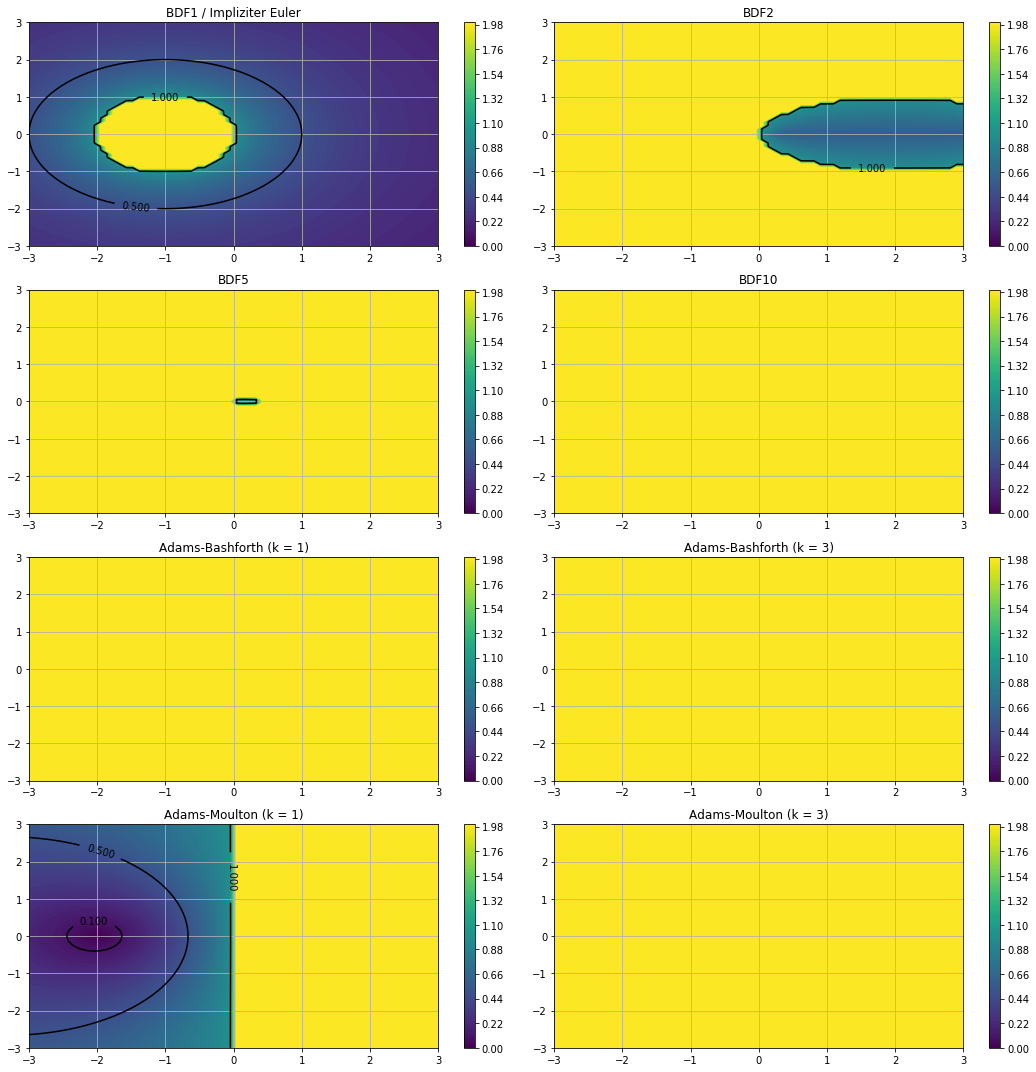

In [6]:
# plots

fig, axs = plt.subplots(4, 2, figsize = (15, 15))

methods = [bdf1, bdf2, bdf5, bdf10, bash1, bash3, moulton1, moulton3]
axs     = axs.flatten()
names   = ["BDF1 / Impliziter Euler", "BDF2", "BDF5", "BDF10", "Adams-Bashforth (k = 1)", "Adams-Bashforth (k = 3)", "Adams-Moulton (k = 1)", "Adams-Moulton (k = 3)"]

# mesh
l = np.linspace(-3, 3, 64)

for method, ax, name in zip(methods, axs, names):

    # see function doc-string for explanation
    z = stability_domain_levels(l, method)

    # areas
    levelsf = np.linspace(0, 2, 100+1)
    cp = ax.contourf(l, l, z, levels = levelsf)

    # lines
    levels  = np.array([0, 0.1, 0.5, 1, 2])
    CS = ax.contour(l, l, z, levels = levels, colors = 'k')

    # labels
    ax.set_title(name)
    plt.clabel(CS, inline = 1, fontsize = 10)

    # auxilary display
    fig.colorbar(cp, ax = ax)
    ax.grid(True)

fig.tight_layout()
plt.show()